In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # to change styles
import matplotlib.style as style

#import magic line to show graphs in jupyter notebook
%matplotlib inline

In [4]:
#formating for seaborn
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [ ]:
style.use('seaborn-talk')

In [2]:
df = pd.read_csv('atla+lok+tdp.csv',index_col = 0)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Average Rating by TV Show
df.groupby('episode of')['rating'].mean().sort_values(ascending = False)

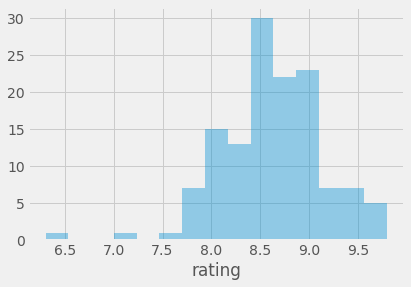

In [6]:
#histogram by overall data
sns.distplot(df['rating'],kde = False)

In [ ]:
#what are those two poorly performing episodes?
df[df['rating']<7.5]

#comes from ATLA and LOK, not TDP

episode of
Avatar: The Last Airbender    AxesSubplot(0.08,0.07;0.87x0.81)
The Dragon Prince             AxesSubplot(0.08,0.07;0.87x0.81)
The Legend of Korra           AxesSubplot(0.08,0.07;0.87x0.81)
Name: rating, dtype: object

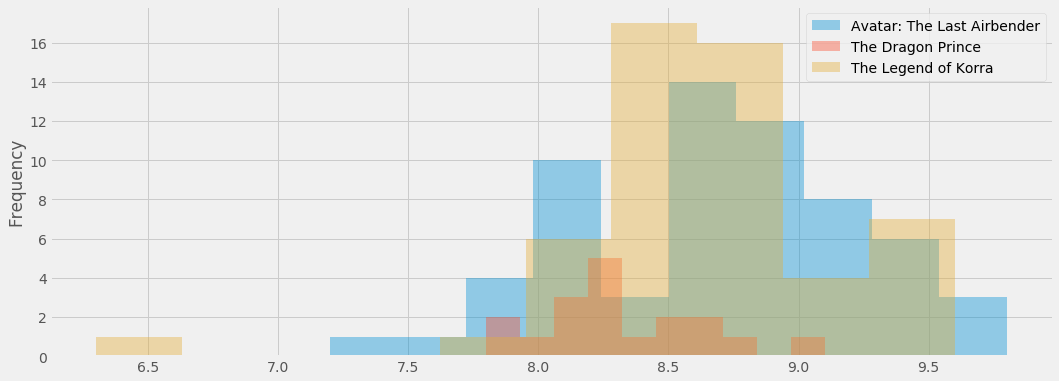

In [8]:
#how does histogram look by show?
plt.figure(figsize = (16,6))
df.groupby('episode of')['rating'].plot(kind = 'hist', alpha = .4, legend = True)

In [ ]:
#explore how this looks as a box & whisker
sns.boxplot(x ='episode of',y='rating',data = df)

#Avatar with the most seasons has the widest episode deviation
#Lok has 2 outliers, both from a good and bad perspective
#TDP stays relatively within 8 and 8.5

In [ ]:
df.groupby('episode of')['rating'].describe().sort_values(by = 'mean', ascending = False)
#confirmed observations
#TDP has the lowest standard deviation

In [ ]:
sns.boxplot(x = 'season',y='rating',data = df[df['episode of']== 'Avatar: The Last Airbender'])

In [ ]:
sns.boxplot(x = 'season',y='rating', hue = 'episode of', data = df,dodge = True)

In [ ]:
#might be able to use category plots
sns.catplot(x='season',y='rating',col = 'episode of',data = df, kind = 'box')

In [ ]:
# some additional interesting trends
#ATLA got consistently better as it advanced the seasons
#Lok was a little more mixed

In [ ]:
df[df['episode of'] == 'The Legend of Korra'].groupby('season')['rating'].describe().sort_values(
    by = 'season', ascending = True)

In [13]:
df[df['season']==0]
#There is no season 0, so why is it plotting it?

,title,episode of,season,episode,rating,votes,original air date,year,plot


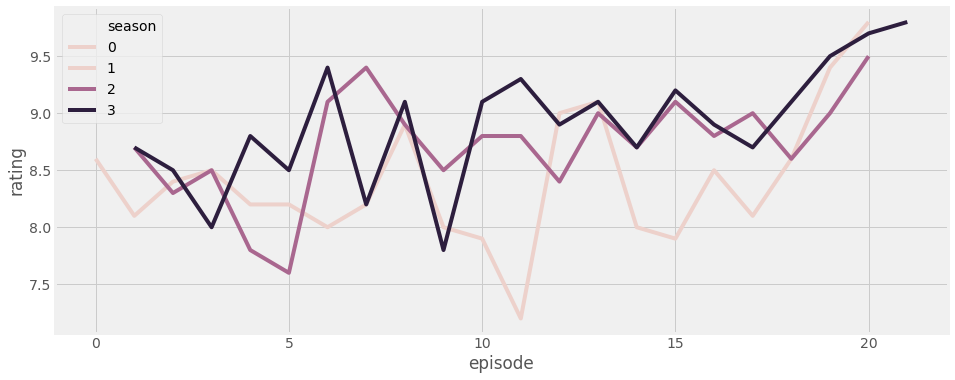

In [5]:
plt.figure(figsize = (16,6))
style.use('fivethirtyeight')

sns.lineplot(x = 'episode',y='rating', 
             hue = 'season',
             data = df[df['episode of'] == 'Avatar: The Last Airbender']
            )

In [ ]:
plt.figure(figsize = (16,6))
style.use('fivethirtyeight')

sns.lineplot(x = 'episode',y='rating', 
             hue = 'season',
             data = df[df['episode of'] == 'Avatar: The Last Airbender']
            )

In [9]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
df[df['episode of']== 'Avatar: The Last Airbender']

,title,episode of,season,episode,rating,votes,original air date,year,plot
0,The Boy in the Iceberg,Avatar: The Last Airbender,1,1,8.101235,2011,2005-02-21,2005,\n The legend of the Avatar is told. Katara...
1,The Avatar Returns,Avatar: The Last Airbender,1,2,8.401235,1760,2005-02-21,2005,\n Aang and Katara inadvertently set off a ...
2,The Southern Air Temple,Avatar: The Last Airbender,1,3,8.501235,1681,2005-02-25,2005,\n After his departure from the Southern Ai...
3,The Warriors of Kyoshi,Avatar: The Last Airbender,1,4,8.201235,1625,2005-03-04,2005,\n The gang arrives at Kyoshi Island and ar...
4,The King of Omashu,Avatar: The Last Airbender,1,5,8.201235,1640,2005-03-18,2005,\n Aang's abilities as an airbender are cha...
5,Imprisoned,Avatar: The Last Airbender,1,6,8.001235,1587,2005-03-25,2005,"\n In a nearby Earth Village, the gang meet..."
6,"The Spirit World: Winter Solstice, Part 1",Avatar: The Last Airbender,1,7,8.201235,1556,2005-04-08,2005,\n Aang and friends visit a village being t...
7,"Avatar Roku: Winter Solstice, Part 2",Avatar: The Last Airbender,1,8,8.901235,1626,2005-04-15,2005,\n To contact the spirit of the previous Av...
8,The Waterbending Scroll,Avatar: The Last Airbender,1,9,8.001235,1503,2005-04-29,2005,"\n Katara, desperate to improve her abiliti..."
9,Jet,Avatar: The Last Airbender,1,10,7.901235,1538,2005-05-06,2005,"\n Aang, Katara, and Sokka have their frien..."


,title,episode of,season,episode,rating,votes,original air date,year,plot
